# Assignment 2

Abdul Azis

PYTN-KS-09-009

---
## Project Overview

Kumpulan data ini adalah catatan dari setiap bangunan atau unit bangunan yang dijual di pasar properti Kota New York selama periode 12 bulan.

## Import Library

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import shapiro
%matplotlib inline
import seaborn as sns

## Data Loading

In [2]:
df = pd.read_csv('nyc-rolling-sales.csv')

Menampilkan 5 baris pertama

In [3]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Menampilkan 5 baris terakhir

In [4]:
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


Menampilkan ukuran dan baris

In [5]:
df.shape

(84548, 22)

## Data Cleaning

Melihat deskripsi data bertipe numerik

In [6]:
df.describe(include='number')

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


Melihat deskripsi data bertipe kategorik

In [7]:
df.describe(exclude='number')

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,LAND SQUARE FEET,GROSS SQUARE FEET,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,84548,84548,84548,84548,84548,84548,84548,84548,84548,84548,84548,84548
unique,254,47,11,1,167,67563,3989,6062,5691,166,10008,364
top,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,,D4,131-05 40TH ROAD,,-,-,R4,-,2017-06-29 00:00:00
freq,3068,18235,38633,84548,12663,210,65496,26252,27612,12989,14561,544


Menghapus kolom 'Unnamed: 0' karena tidak berguna

In [8]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
df.select_dtypes('object')

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,LAND SQUARE FEET,GROSS SQUARE FEET,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,,C2,153 AVENUE B,,1633,6440,C2,6625000,2017-07-19 00:00:00
1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,,C7,234 EAST 4TH STREET,,4616,18690,C7,-,2016-12-14 00:00:00
2,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,,C7,197 EAST 3RD STREET,,2212,7803,C7,-,2016-12-09 00:00:00
3,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,,C4,154 EAST 7TH STREET,,2272,6794,C4,3936272,2016-09-23 00:00:00
4,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,,C2,301 EAST 10TH STREET,,2369,4615,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
84543,WOODROW,02 TWO FAMILY DWELLINGS,1,,B9,37 QUAIL LANE,,2400,2575,B9,450000,2016-11-28 00:00:00
84544,WOODROW,02 TWO FAMILY DWELLINGS,1,,B9,32 PHEASANT LANE,,2498,2377,B9,550000,2017-04-21 00:00:00
84545,WOODROW,02 TWO FAMILY DWELLINGS,1,,B2,49 PITNEY AVENUE,,4000,1496,B2,460000,2017-07-05 00:00:00
84546,WOODROW,22 STORE BUILDINGS,4,,K6,2730 ARTHUR KILL ROAD,,208033,64117,K6,11693337,2016-12-21 00:00:00


Terlihat bahwa kolom LAND SQUARE FEET, GROSS SQUARE FEET, SALE PRICE termasuk tipe data object yang seharusnya tipe data numerik, oleh karena itu akan diubah menjadi float

In [10]:
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

Mengubah tipe data kolom 'SALE DATE' menjadi datetime

In [11]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

Mengelompokkan tipe data kategorik dan numerik

In [12]:
numeric_cols = df.select_dtypes(include='number').columns
category_cols =  df.select_dtypes(exclude='number').columns

Mengubah angka menjadi nama wilayah

In [13]:
df['BOROUGH'][df['BOROUGH'] == 1] = 'Manhattan'
df['BOROUGH'][df['BOROUGH'] == 2] = 'Bronx'
df['BOROUGH'][df['BOROUGH'] == 3] = 'Brooklyn'
df['BOROUGH'][df['BOROUGH'] == 4] = 'Queens'
df['BOROUGH'][df['BOROUGH'] == 5] = 'Staten Island'

C:\Users\ACER\AppData\Local\Temp\ipykernel_22064\1957274471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BOROUGH'][df['BOROUGH'] == 1] = 'Manhattan'


Mengecek duplikasi data

In [14]:
df[df.duplicated()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
208,Manhattan,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,,A4,231 WEST 22ND STREET,,...,1,0,1,1588.0,5653.0,1900,1,A4,10.0,2017-01-30
209,Manhattan,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,,A4,231 WEST 22ND STREET,,...,1,0,1,1588.0,5653.0,1900,1,A4,10.0,2017-01-30
471,Manhattan,CHELSEA,10 COOPS - ELEVATOR APARTMENTS,2,797,76,,D4,"166 WEST 22ND STREET, 4C",,...,0,0,0,NaN,NaN,1950,2,D4,839000.0,2017-06-29
683,Manhattan,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,774,1042,,R4,252 SEVENTH AVENUE,4K,...,1,0,1,NaN,NaN,0,2,R4,1500000.0,2016-10-05
1436,Manhattan,CIVIC CENTER,46 CONDO STORE BUILDINGS,4,175,1301,,RK,90 FRANKLIN STREET,B,...,0,0,1,NaN,NaN,0,4,RK,NaN,2017-04-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84209,Staten Island,WILLOWBROOK,01 ONE FAMILY DWELLINGS,1,748,18,,A2,586 WOOLLEY AVENUE,,...,1,0,1,5000.0,1080.0,1955,1,A2,NaN,2017-02-07
84292,Staten Island,WILLOWBROOK,02 TWO FAMILY DWELLINGS,1,735,24,,B9,492 INGRAM AVENUE,,...,2,0,2,2200.0,1440.0,1970,1,B9,NaN,2016-09-08
84319,Staten Island,WILLOWBROOK,02 TWO FAMILY DWELLINGS,1,790,80,,B2,267 CRAFTON AVENUE,,...,2,0,2,4320.0,2288.0,1970,1,B2,NaN,2017-01-10
84346,Staten Island,WILLOWBROOK,02 TWO FAMILY DWELLINGS,1,1975,513,,B2,180 WALCOTT AVENUE,,...,2,0,2,4100.0,2010.0,1975,1,B2,NaN,2017-07-03


In [15]:
df.duplicated().sum()

765

Terdapat 765 baris duplikat, maka akan dilakukan penghapusan pada baris duplikat tersebut

In [16]:
df.drop_duplicates(inplace=True)

Mengecek kembali baris duplikat

In [17]:
df.duplicated().sum()

0

Sudah tidak terdapat baris duplikat

Mengecek missing values

In [18]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26054
GROSS SQUARE FEET                 27385
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

Missing values yang terdapat pada ketiga kolom akan diatasi dengan median

In [19]:
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].median())
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].median())
df['SALE PRICE'] = df['SALE PRICE'].fillna(df['SALE PRICE'].median())

In [20]:
df.isnull().sum().sum()

0

Sudah tidak terdapat missing values

Reset index dikarenakan terdapat penghapusan beberapa baris sebelumnya

In [21]:
df.reset_index(drop = True, inplace = True)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616.0,18690.0,1900,2,C7,533000.0,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212.0,7803.0,1900,2,C7,533000.0,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


In [22]:
df_numeric = df[numeric_cols]
df_category =  df[category_cols]

In [23]:
col_check_outlier = df_numeric.select_dtypes('number')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


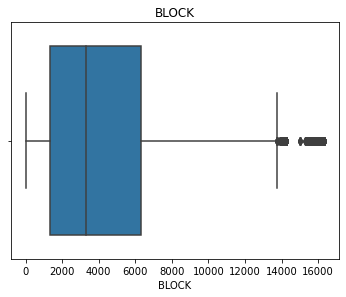

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


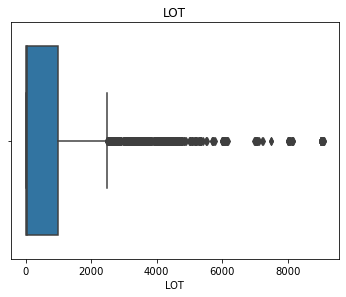

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


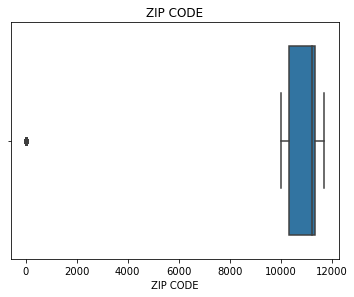

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


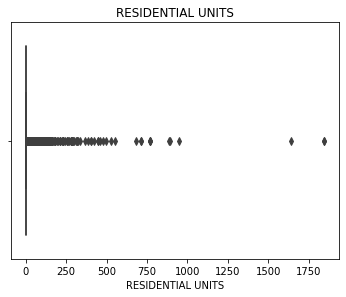

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


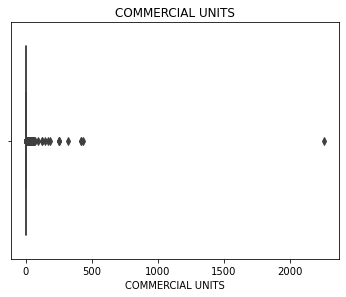

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


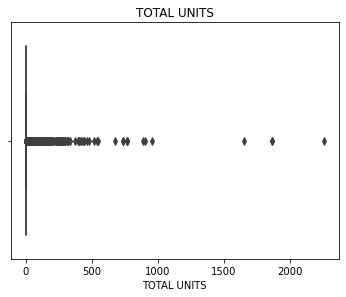

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


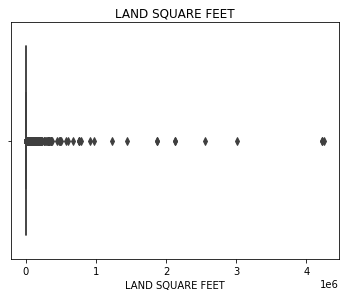

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


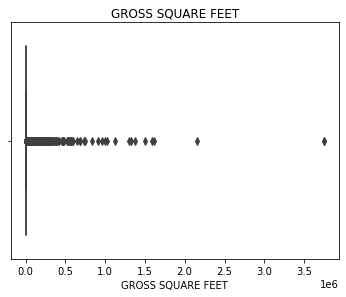

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


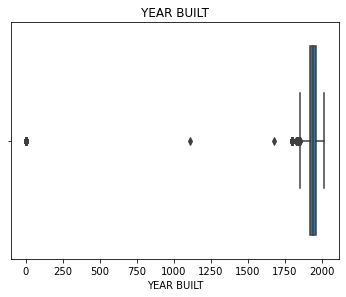

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


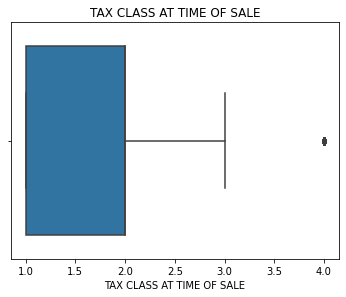

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


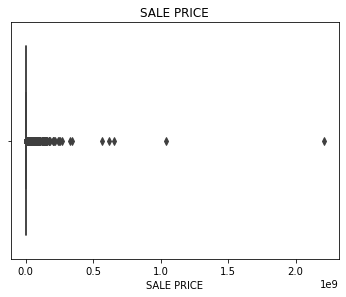

In [24]:
for i in col_check_outlier:
    n=1
    plt.figure(figsize=(20,20))
    plt.subplot(4,3,1)
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()
    n=n+1

In [25]:
for feature in col_check_outlier:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    
    lower_bound = df[feature].quantile(0.25) - (1.5*IQR)
    upper_bound = df[feature].quantile(0.75) + (1.5*IQR)
    
    df.loc[(df[feature]<lower_bound ),feature] = lower_bound 
    df.loc[(df[feature]>upper_bound),feature] = upper_bound

---
# Measure of Central Tendency 

---
## A. Measure of Central Tendency : Mean

**Question** 

Hitunglah rata-rata luas tanah untuk setiap wilayah!

**Pre-processing as needed**

In [26]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,6.0,,C2,153 AVENUE B,,...,5,0,3.5,1633.0,3184.0,1900.0,2.0,C2,1637500.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26.0,,C7,234 EAST 4TH STREET,,...,5,0,3.5,3625.0,3184.0,1900.0,2.0,C7,533000.0,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,39.0,,C7,197 EAST 3RD STREET,,...,5,0,3.5,2212.0,3184.0,1900.0,2.0,C7,533000.0,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402.0,21.0,,C4,154 EAST 7TH STREET,,...,5,0,3.5,2272.0,3184.0,1913.0,2.0,C4,1637500.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404.0,55.0,,C2,301 EAST 10TH STREET,,...,5,0,3.5,2369.0,3184.0,1900.0,2.0,C2,1637500.0,2016-11-17


In [27]:
df.groupby('BOROUGH')['GROSS SQUARE FEET'].agg('mean')

BOROUGH
Bronx            1674.507292
Brooklyn         1519.860924
Manhattan        1810.862778
Queens           1802.334752
Staten Island    1710.531099
Name: GROSS SQUARE FEET, dtype: float64

---
## B. Measure of Central Tendency : Median

**Question** 

Hitunglah median luas tanah untuk setiap wilayah!

**Pre-processing as needed**

In [28]:
df.groupby('BOROUGH')['GROSS SQUARE FEET'].agg('median')

BOROUGH
Bronx            1764.0
Brooklyn         1520.0
Manhattan        1680.0
Queens           1680.0
Staten Island    1680.0
Name: GROSS SQUARE FEET, dtype: float64

---
## C. Measure of Central Tendency : Modus

**Question** 

Tentukan wilayah yang paling sering terjadi penjualan properti!

**Pre-processing as needed**

In [29]:
df['BOROUGH'].mode()[0]

'Queens'

---
# Measure of Spread

## A. Measure of Spread : Range

**Question** 

Tentukan jangkauan dari luas tanah tertinggi hingga terendah!

**Pre-processing if needed**

In [30]:
df['LAND SQUARE FEET'].max() - df['LAND SQUARE FEET'].min()

2600.0

---
## B. Measure of Spread : Variance

**Question** 

Tentukan variansi dari luas tanah untuk setiap penjualan properti!

**Pre-processing if needed**

In [31]:
df['LAND SQUARE FEET'].var(ddof=1)

613327.4204444417

---
## C. Measure of Spread : Standard Deviation

**Question** 

Tentukan standar deviasi dari luas tanah untuk setiap penjualan properti!

**Pre-processing if needed**

In [32]:
df['LAND SQUARE FEET'].std(ddof=1)

783.1522332499868

---
# Probability Distribution

**Question**

Visualisasikan distribusi data dari luas tanah untuk setiap penjualan properti!

**Pre-processing if needed**

In [33]:
sample_means = [df['LAND SQUARE FEET']]
sample_means = []
n = 333
for sample in range(0, 1500):
    # mengambil nilai n acak dari fitur 'SALE PRICE'
    sample_values = np.random.choice(a=df['LAND SQUARE FEET'], size=n)    
    # menghitung rata-rata sample
    sample_mean = np.mean(sample_values)
    # menginput rata-rata sample ke sample_means
    sample_means.append(sample_mean)

Menampilkan distribusi data terkait luas tanah yang telah disampling

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

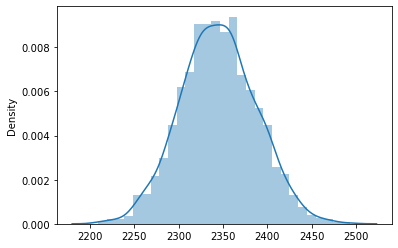

In [34]:
sns.distplot(sample_means)

---
# Confidence Intervals

**Question**

Tentukan confidence intervals (CI) sebesar 90% dari rata-rata luas tanah untuk setiap penjualan properti!

**Pre-processing if needed** 

In [35]:
st.t.interval(alpha=0.90, df=len(df['LAND SQUARE FEET'])-1,
              loc=np.mean(df['LAND SQUARE FEET']),
              scale=st.sem(df['LAND SQUARE FEET']))

(2340.3785023732653, 2349.27932797418)

---
# Hypothesis Testing

**Question**

Apakah luas tanah membentuk distribusi normal?

**Pre-processing if needed** 

In [36]:
stat, p = shapiro(df['LAND SQUARE FEET'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.898, p=0.000
Probably not Gaussian


E:\Anaconda\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


---
# Overall Analysis

- Berdasarkan hasil analisis, terdapat banyak sekali missing values, outlier, data duplikat dan data tidak sesuai dengan fiturnya, sehingga diperlukan analisis dengan teliti.
- Jika data luas tanah di sampling hingga ~1500 maka data tersebut membentuk distribusi normal.